#  Demand 

In [1]:
# HIDDEN

from datascience import *

import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-muted')
%matplotlib inline

from IPython.display import display
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Economics is in the world around us, and so is Data Science! It's in our every day lives. As we connect Data Science with Economics, we will be exploring real life datasets to illustrate how Economics concepts are shaped and how decisions lead to real-life impacts.

## Intro to Jupyter Notebooks

Welcome to Jupyter notebooks, a place used to write programs, write texts, and view the results.

Each rectangle is called a *cell*. There are two types of cells: text or code. Text cells, like this one, can be edited by double-clicking on them. 

To run a cell, click the "▶| Run" button on the top menu bar or hold `shift` + `return` (or `shift` + `enter`). 

**Question 1.1.** Try editing this paragraph so it only says "Economics is fun." Then click the "run cell" ▶| button or hold down `shift` + `return`. This sentence, for example, should be deleted. Edit by double-clicking this cell.

In [2]:
#Run this cell
print("Hello, World!")

Hello, World!


**Question 1.2.** Other cells contain code in Python 3 language. Running a cell with code will execute all the code it contains. To run the code in a code cell, first click on that cell to activate it. It'll be highlighted with a little green or blue rectangle. Run the following cells.

In [3]:
print("Economics is fun!")
print("I love data science!")

Economics is fun!
I love data science!


## SymPy ##

Python has many tools, such as the SymPy library [https://docs.sympy.org/latest/tutorial/index.html] that we can use for expressing and evaluating formulas and functions in economics. 

Since SymPy helps with symbolic math, we start out by create a symbol using `Symbol`, which we assign to a variable name. Then, we can use the symbols for constructing symbolic expressions.

#### Example 1 ####

In [4]:
x = sympy.Symbol('x')
x

x

Now let's try using SymPy for creating a symbolic expression for supply and demand curves.

Let's start out with an upward sloping Supply curve, where P_S is price and Q_S is quantity suppled. Create symbols for the variables P_S and Q:

In [5]:
P_S = sympy.Symbol('P_S')
P_S

P_S

In [6]:
Q_S = sympy.Symbol('Q_S')
Q_S

Q_S

In [7]:
P_S = 2 * Q_S - 4
P_S

2*Q_S - 4

#### Example 2####
Let's suppose our demand function is $Quantity_{D}=-2 * Price_{D} + 10$. Using SymPy, this would be


In [8]:
q = sympy.Symbol("q")
demand = -2*q + 10
demand

-2*q + 10

Suppose we have a supply function $Price_{S}=3 * Quantity_{S} + 1$. Using SymPy, this would be

In [9]:
supply = 3*q + 1
supply

3*q + 1

## Demand Curves and Airline Tickets ##

Now, we will learn about the demand curve and using both the supply and demand curve to find market equilibrium. 

The demand curve shows the graphical relationship between the price of a good or service and the quantity demanded for it over a given period of time. In other words, it shows the quantity of goods or services consumers are willing to buy at each market price. The quantity of goods or services demanded or supplied is a function of price, as in   $$\text{Quantity} = f(Price)$$

The curve decreases because of the law of demand, which states that as the price of a good or service increases, the quantity demanded for it decreases, assuming all other factors are held constant. This makes intuitive sense: as prices increase, fewer people are willing to pay the higher price for the same good. Naturally, as prices decrease, more people are willing to pay the lower price for the same good. Hence, the demand of a good or service is based on the price. This relationship is usually somewhat linear and can be found as $$\text{Quantity}_{d}=a * Price_{d} + b$$

This can be interpreted as: As the price unit increases by 1, there is an a unit increase/decrease in the quantity demanded. An example is $$\text{Quantity}_{d}=2 * Price_{d} + 3$$

Another concept is when price is dependent on quantity. In this case, we use an inverse demand function, as it is an inverse function of the demand function. Thus, price is a function of quantity, as shown by $$\text{Price} = f(Quantity)$$ Because it is the inverse of a demand function, the inverse demand function for the example above will be $$\text{Price}_{d}=1/2*Quantity_{d}-3/2$$

### Shifts in Demand Curve###

The demand curve can shift out or in based on events happening in the real world. Some factors other than a change in price of the good/service are changes in 

1. buyer's income
2. consumer preferences
3. expectation of future price/supply/demand/etc
4. price of related goods

If any of these changes occur and causes the demand for the selected good/service to decrease, then the curve shifts to the left, as less of the good or service will be demanded at every price. During the 2008 recession, consumers' incomes decreased. Because their buying power decreased, they purchased fewer items even though the prices of the select goods stayed the same. 

### Working with Airline Dataset ###

We will now apply what we learned about demand functions and market equilibrium onto a real world dataset. We want to answer the question "What is the market equilibrium for airline tickets?" We will use a dataset released by the U.S. Department of Transportation on about 1,000 U.S. domestic routes for the 4th quarter of 2002. 

In [10]:
airlines = Table.read_table('airlines.csv')
airlines

City 1,City 2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share,Average Fare.1,Low Price Airline,Market Share.1,Price
CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
CAK,MCO,122.47,860,276.84,FL,75.1,123.09,DL,17.23,118.94
ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
ALB,BWI,69.4,288,606.84,WN,96.97,68.86,WN,96.97,68.86
ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174
ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
ALB,TPA,134.17,1130,202.93,US,35.4,132.91,DL,26.4,124.78


**Question 3.1** Remember that at the end of the day, we want columns relating to price and quantity. Create a new table that does just that. 

In [11]:
airlines = airlines.drop("Price")
airlinesFiltered = airlines.relabeled(["Average Fare", "Average Weekly Passengers"], ["Price", "Quantity"])

**Question 3.2** Revenue Per Available Seat Mile (RASM) measures the efficiency of different airlines. It is found by dividing the average fare by the distance. The higher the RASM, the more profitable the airline

Create a scatter plot that displays the RASM of the dataset.

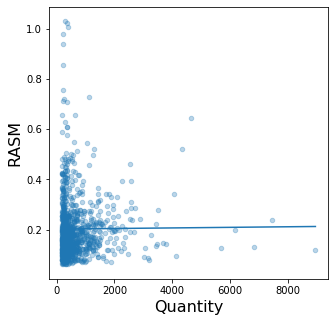

In [12]:
rasm = Table().with_columns("RASM", airlinesFiltered.column("Price") / airlines.column("Distance"), "Quantity", airlines.column(4))
rasm.scatter("Quantity", "RASM", fit_line = True, alpha = 0.3, color = "tab:blue")

That looks unconvincing. Let's segment the market based on distance into 3 categories. Make a scatter plot when you're done. 

1. short (distance is less than 700)
2. medium (distance is greater than or equal to 700 and less than 1900)
3. long (distance is greater than or equal to 1900)

In [56]:
airlinesFiltered

City 1,City 2,Price,Distance,Quantity,Market Leading Airline,Market Share,Average Fare.1,Low Price Airline,Market Share.1
CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19
CAK,MCO,122.47,860,276.84,FL,75.1,123.09,DL,17.23
ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77
ALB,BWI,69.4,288,606.84,WN,96.97,68.86,WN,96.97
ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34
ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09
ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94
ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59
ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84
ALB,TPA,134.17,1130,202.93,US,35.4,132.91,DL,26.4


In [57]:
short = airlinesFiltered.where(airlinesFiltered.column("Distance") < 700)
medium = airlinesFiltered.where(airlinesFiltered.column("Distance") >= 700 & (airlinesFiltered.column("Distance") < 1900))
long = airlinesFiltered.where(airlinesFiltered.column("Distance") >= 1900)

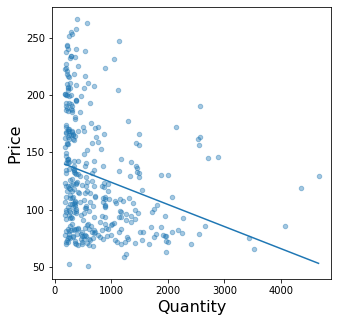

In [58]:
short.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

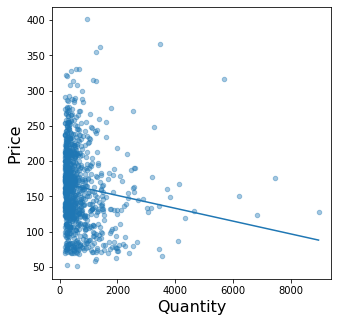

In [59]:
medium.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

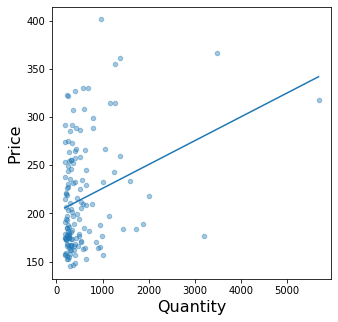

In [60]:
long.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

Most of the data seems to be scattered between 0 and 2000. Let's only look at that data for each of the market segments.

In [61]:
short = short.where(short.column("Quantity") < 2000)
medium = medium.where(medium.column("Quantity") < 2000)
long = long.where(long.column("Quantity") < 2000)

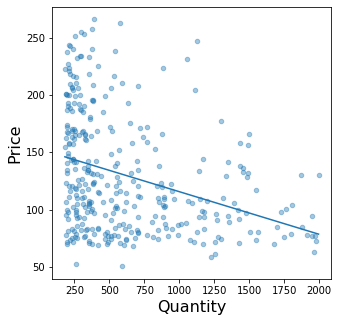

In [62]:
short.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

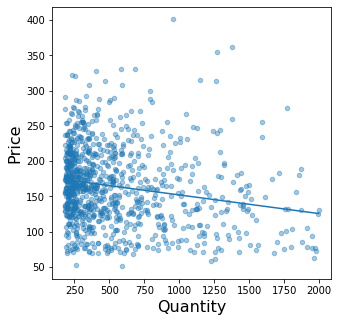

In [63]:
medium.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

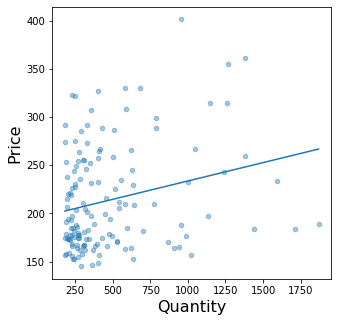

In [64]:
long.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

**Question 3.3** Now you should see a linear relationship between price and quantity. Find and interpret an equation for each market segment. 

The general template is y = mx + b, where m is the slope and b is y-intercept. In economic terms, m is the demand curve's slope that shows how the good's price affects the quantity demanded, and b encompasses the effects of all of the factors that are not price that affect demand. 

In [65]:
shortCoefficients = np.polyfit(short.column("Quantity"),short.column("Price"),1)
mediumCoefficients = np.polyfit(medium.column("Quantity"), medium.column("Price"),1)
longCoefficients = np.polyfit(long.column("Quantity"), long.column("Price"),1)

np.polyfit returns an array of size 2, where the 0th index is the slope and 1st index is the y-intercept. 

In [66]:
shortCoefficients

array([-3.71445384e-02,  1.52809004e+02])

In [67]:
mediumCoefficients

array([-2.64947489e-02,  1.78500087e+02])

In [68]:
longCoefficients

array([3.80708469e-02, 1.95553483e+02])

What do we notice? The short-distance and medium-distance flights have a negative slope, and the long-distance flighs have a positive slope. In general, negative slopes indicates an inverse relationship, in which as one variable's values increase, the other variable's values decrease. With positive slops, as one variable's values increase, the other variable's values increase too. 

In [26]:
Q = sympy.Symbol("Q")
shortdemand = -0.037 * Q + 152.8
shortdemand

-0.037*Q + 152.8

In [27]:
mediumdemand = -0.026 * Q + 178.5
mediumdemand

-0.026*Q + 178.5

In [28]:
shortCoefficients

array([-3.71445384e-02,  1.52809004e+02])

In [29]:
longdemand = .038 * Q + 195.5
longdemand

0.038*Q + 195.5

SymPy orders the equations so that the positve-value terms lead the equation, which is why for short-distance and medium-distance flights, the equation is y = b + mx, while for long-distance flights, the equation is y = mx + b. 

It is important to remember that scatter plots do not prove cause and effect relationships. Rather, they just show whether there is a positive, negative, or neutral relationship between two variables.

**Question 3.4** Let's assume the supply curve for airfare is y = 0.0225x + 100 for each. This supply curve is not based on any data. Use SymPy to create an expression for supply and interpret what this means.

In [30]:
supply = 0.0225 * Q + 100
supply

0.0225*Q + 100

Remember that supply curves show how much of a good suppliers are willing and able to supply at different prices. In this case, as the price of the airfare ticket increases, the quantity of airfare tickets that airlines are willing to supply increases. This makes sense, because firms are rational and want to maximize their profits.

**Question 3.5** Find the quantity equilibrium using the supply and demand curves for each market. Describe Q*. 

Quantity equilibrium is the quantity at which the supply curve and demand curve intersect. The quantity of the good that consumers desire to purchase is equivalent to the quantity of the good that producers supply. There is no shortage or surplus of the product at this quantity. In this case, quantity equilibrium would be both the number of airfare tickets that consumers want to purchase and airlines want to provide. 

In [31]:
Q_star_short = solve(shortdemand, supply)
Q_star_short

887.394957983193

In [32]:
Q_star_medium = solve(mediumdemand, supply)
Q_star_medium

1618.55670103093

In [33]:
Q_star_long = solve(longdemand, supply)
Q_star_long

-6161.29032258064

This means that the number of airline tickets that consumers want to purchase and airlines want to provide are about 887 for short-distance flights, 1618 for medium-distance flights, and 1578 for long-distance flights. 

Why might airlines want to have fewer tickets for long-distance flights compared to medium-distance flights? 

**Question 3.6** Find the price equilibrium using the supply and demand curves for each market. Describe P*.

Price equilibrium is the price at which the supply curve and demand curve intersect. The price of the good that consumers desire to purchase at is equivalent to the price of the good that producers want to sell at. There is no shortage of surplus of the product at this price. In this case, price equilibrium would be both the price of airfare tickets that consumers want to purchase at and the price of airfare tickets that the airlines want to sell at. 

In [34]:
shortdemand.subs(Q, Q_star_short)
supply.subs(Q, Q_star_short)

119.966386554622

In [35]:
mediumdemand.subs(Q, Q_star_medium)
supply.subs(Q, Q_star_medium)

136.417525773196

In [36]:
longdemand.subs(Q, Q_star_long)
supply.subs(Q, Q_star_long)

-38.6290322580645

This means that the price of airline tickets that consumers want to purchase at and airlines want to provide are about 119.97 dollars for short-distance flights, 136.41 dollars for medium-distance flights, and 135.52 dollars for long-distance flights.

This might seem kind of low. Given that this data is from 2002, let's convert these dollar amounts to present-day value. As of 2019, the price equilibrium is 173.83 dollars for short-distance flight, 197.66 dollars for medium-distance flights, and 196.36 dollars for long-distance flights. 

Even then, that seems kind of low. Why else do you think flight tickets prices have increased?  

A few reasons are 
- fewer major airline industries. There have been many mergers and bankruptcies in the past, so the decreased competition means airlines can raise prices
- plane fuel costs have increased. In 2002, airline fuel costed 55 cents a gallon. Now, it is 1.95 dollars a gallon
- increasing number of taxes and fees per passenger. New fees such as September 11 Security Fee, US Federal Domestic Segment Fee, and US Travel Facilities Tax have increased the overall price per ticket. 

You can read more about this increase in airline prices at https://www.nomadicmatt.com/travel-blogs/expensive-airfare/

**Question 3.7** Visualize the market equilibrium on a graph. Describe the market equilibrium in this case.

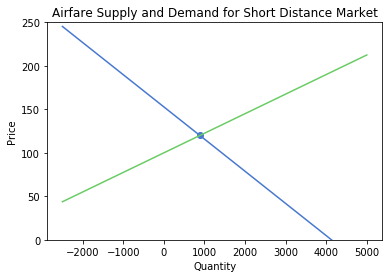

In [37]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(shortdemand, -2500, 5000)
plot_equation(supply, -2500, 5000)
plt.ylim(0,250)
plt.title("Airfare Supply and Demand for Short Distance Market")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, shortdemand)
plt.show()

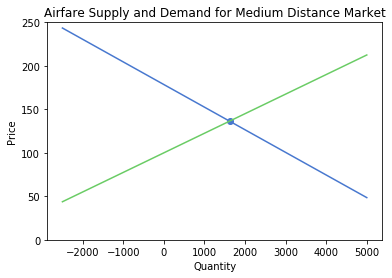

In [38]:
plot_equation(mediumdemand, -2500, 5000)
plot_equation(supply, -2500, 5000)
plt.ylim(0,250)
plt.title("Airfare Supply and Demand for Medium Distance Market")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, mediumdemand)
plt.show()

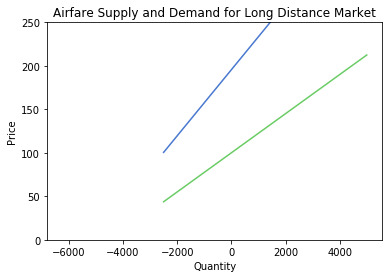

In [39]:
plot_equation(longdemand, -2500, 5000)
plot_equation(supply, -2500, 5000)
plt.ylim(0,250)
plt.title("Airfare Supply and Demand for Long Distance Market")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, longdemand)
plt.show()

How do the three market segments compare against each other?

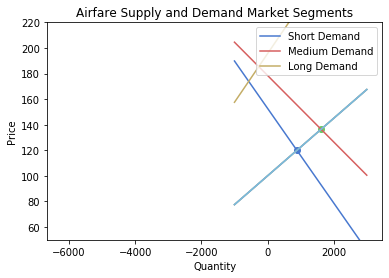

In [40]:
plot_equation(shortdemand, -1000, 3000, label = "Short Demand")
plot_equation(supply, -1000, 3000)
plt.ylim(50,220)
plt.title("Airfare Supply and Demand Market Segments")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, shortdemand)

plot_equation(mediumdemand, -1000, 3000, label = "Medium Demand")
plot_equation(supply, -1000, 3000)
plot_intercept(supply, mediumdemand)

plot_equation(longdemand, -1000, 3000, label = "Long Demand")
plot_equation(supply, -1000, 3000)
plot_intercept(supply, longdemand)

plt.legend(loc = "upper right")
plt.show()

**Question 3.8** Assume the economy boosted 4% last quarter and all consumers in the short distance airfare industry now have $40 more to spend on airfare. How will this impact the demand curve? Describe how this will change market equilibrium both algebraically and graphically.

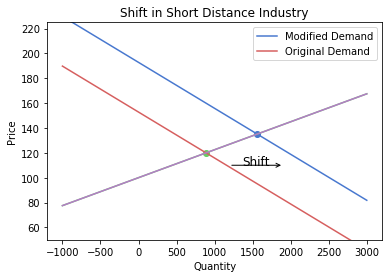

In [41]:
newDemand = shortdemand + 40
Q_star = solve(newDemand, supply)
newDemand.subs(Q, Q_star)
supply.subs(Q, Q_star)

plot_equation(newDemand, -1000, 3000, label = "Modified Demand")
plot_equation(supply, -1000, 3000)
plt.ylim(50,225)
plt.title("Shift in Short Distance Industry")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, newDemand)

plot_equation(shortdemand, -1000, 3000, label = "Original Demand")
plot_equation(supply, -1000, 3000)
plot_intercept(supply, shortdemand)

plt.legend(loc = "upper right")

xstmark=1200
xenmark=1900
ystmark=110
an1=plt.annotate(s='',xy=(xstmark, ystmark), xycoords='data', xytext=(xenmark, ystmark),textcoords='data', arrowprops=dict(arrowstyle="<-"))
plt.annotate(s='Shift',xy=(((xstmark+xenmark)/2), ystmark), xycoords='data',fontsize=12.0,textcoords='data',ha='center')

plt.show()

This increase in price equilbrium and quantity equilibrium makes sense. Because the economy increased and consumers' purchasing powers increased by 40 dollars, they are willing to spend  40 dollars more on flights. Because the suppliers (airlines) are rational, they want to maximize their profit, so they are willing to sell the airline tickets for 40 dollars more. Hence, the price equilibrium increases by 40 dollars. 

# 4. Demand Curves and Delta's Innovations 

**Question 4.1** In 2002, Delta sponsored the 2002 Olympic Winter Games at its Salt Lake City hub. Different technological innovations, such as kiosks at check-in, expanded gate information systems and virtual check-in on websites improved customer experience. Because of these two factors, consumers believed Delta was a promising airline to fly on. Manipulate the original table to only assume Delta flights for Market Leading Airline and see if its demand curve is different from the general demand curve. Delta flights can be found by "DL(insert 3 spaces)", as there are three spaces after DL. Why do you think there is a difference or is not a difference?

In [42]:
airlines

City 1,City 2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share,Average Fare.1,Low Price Airline,Market Share.1
CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19
CAK,MCO,122.47,860,276.84,FL,75.1,123.09,DL,17.23
ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77
ALB,BWI,69.4,288,606.84,WN,96.97,68.86,WN,96.97
ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34
ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09
ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94
ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59
ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84
ALB,TPA,134.17,1130,202.93,US,35.4,132.91,DL,26.4


The following cell of code is provided.

In [43]:
delta = airlines.where("Market Leading Airline", "DL")
delta = delta.select(["Average Fare", "Average Weekly Passengers"])
delta = delta.relabeled(["Average Weekly Passengers", "Average Fare"], ["Quantity", "Price"])
delta = delta.where(delta.column("Quantity") < 2000)

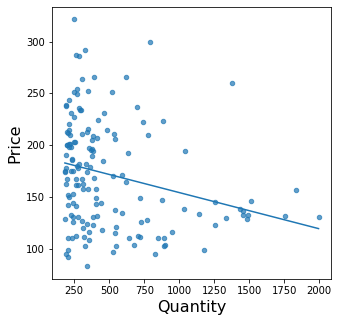

In [44]:
delta.scatter("Quantity", "Price", fit_line = True, color = "tab:blue")

In [45]:
np.polyfit(delta.column("Quantity"),delta.column("Price"),1)

array([-3.49594506e-02,  1.89076806e+02])

In [46]:
deltademand = -0.035 * Q + 189.1

Why do you think there is a negative relationship between price and quantity for Delta flights? 

**Question 4.2** Suppose the supply curve is supply = 0.03 * Q + 14. Write its expression in SymPy. 

In [47]:
deltasupply = 0.03 * Q + 14

**Question 4.3** Find the quantity equilibrium.

In [48]:
Q_star_delta = solve(deltademand, deltasupply)
Q_star_delta

2693.84615384615

**Question 4.4** Find the price equilibrium.

In [49]:
deltademand.subs(Q, Q_star_delta)
deltasupply.subs(Q, Q_star_delta)

94.8153846153846

**Question 4.5** Find the market equilibrium. Visualize it.

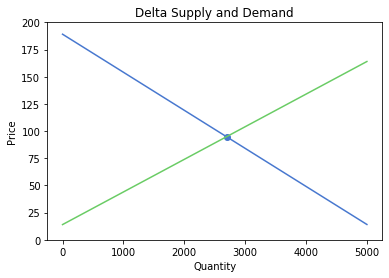

In [50]:
plot_equation(deltademand, 0, 5000)
plot_equation(deltasupply, 0, 5000)
plt.ylim(0,200)
plt.title("Delta Supply and Demand")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(deltasupply, deltademand)
plt.show()

# 5. Consumer Surplus

A competitive market is comprised of producers who make goods and services and the consumers who purchase and use them. Through market forces, these consumers and producers agree on a common price for the good or service in question. We will assume that there is no price discrimination and all consumers face the same price. This is typical but not always the case in the real world. Although all consumers face the same market price, consumers are different in how much they individually value a good. We say that consumers have a maximum price that they are willing to pay for a good, and any price marginally higher than this price will dissuade the consumer from participating in the market. This max WTP (willingness to pay) price varies among entities based on their desire for the good, which in turn can be based on how much of the good they already have.

Consider the market for electricity. Among consumers we have entities such as households, commercial buildings, factories, and so on. A factory would likely have a very high WTP for electricity because the opportunity costs for factories to not operate are very high. Capital is expensive, employees still have to be paid, and it is inconvenient to have to stop and start up machinery frequently. Thus, for a factory it is preferable to always have a reliable supply of electricity to continue operations and this need is reflected in the WTP. Contrast this with households, who certainly value having electricity, but should electricity become prohibitively expensive, probably would decide to cut back on usage as the drawbacks of not having electricity aren't as severe compared to the factory above.

## Example

We create a consumer class with a WTP characteristic, and a list of consumers with WTP from 10 to 1. The binary function `demand` indicates whether the consumer participates in the market at a given price or not.

In [51]:
class Consumer:
    def __init__(self, WTP):
        self.WTP = WTP
    def demand(self, price):
        if price <= self.WTP:
            return 1
        else:
            return 0
    def surplus(self, price):
        if price <= self.WTP:
            return self.WTP - price
        else:
            return 0
        
consumers = [Consumer(x) for x in range(10,0,-1)]

print([x.demand(6) for x in consumers])

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


**Question 5.1**For a market price of 6, we have 5 consumers who participate and 5 who don't. Now let's make a matrix of the lists of participants for each market price between 1 and 10.

In [52]:
for price in range(10,0,-1):
    print([x.demand(price) for x in consumers])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Question 5.2** Notice the vague resemblance to a downward-sloping demand curve. The left-most consumer, with a WTP of 10, always participates for these prices. The right-most consumer only participates at a market price of 1. Now lets try and find participation for each price point, starting at 10.

In [53]:
print("Market Price:", "Market Participants")
print("")
for price in range(10,0,-1):
    if price == 10:
        print(str(price) + ":", sum([x.demand(price) for x in consumers]))
    else:
        print(str(price) + ": ", sum([x.demand(price) for x in consumers]))

Market Price: Market Participants

10: 1
9:  2
8:  3
7:  4
6:  5
5:  6
4:  7
3:  8
2:  9
1:  10


**Question 5.3** Here, each number represents the total number of market participants as the market price *decreases* starting from 10. Notice as the price decreases, participation increases in this demand case. Now lets find actual surplus.

In [54]:
for price in range(10,0,-1):
    print([x.surplus(price) for x in consumers])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
[5, 4, 3, 2, 1, 0, 0, 0, 0, 0]
[6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
[7, 6, 5, 4, 3, 2, 1, 0, 0, 0]
[8, 7, 6, 5, 4, 3, 2, 1, 0, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


**Question 5.4** Instead of printing a binary 1 or 0 indicating market participation, we've displayed each participant's actual surplus value. Similarly, let's find total surplus per price point.

In [55]:
print("Market Price:", "Consumer Surplus")
print("")
for price in range(10,0,-1):
    if price == 10:
        print(str(price) + ":", sum([x.surplus(price) for x in consumers]))
    else:
        print(str(price) + ": ", sum([x.surplus(price) for x in consumers]))

Market Price: Consumer Surplus

10: 0
9:  1
8:  3
7:  6
6:  10
5:  15
4:  21
3:  28
2:  36
1:  45
